## Week 6 Capstone Work

For Week 6, include concepts such as decision trees and random forests.

In [48]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Read in previous data
team = pd.read_csv('data/cleaned/teamstats_eng.csv', sep=',', header=0)
wr = pd.read_csv('data/cleaned/wr_eng.csv', sep=',', header=0)

In [3]:
# Team stats to predict inj
X_team = team.drop(columns=['year', 'team', 'wins', 'losses', 'injuries']).copy()
y_team = team['injuries'].copy()
scores_team = []

# Team stats to predict win_loss_perc
X_team2 = team.drop(columns=['year', 'team', 'wins', 'losses', 'win_loss_perc']).copy()
y_team2 = team['win_loss_perc'].copy()
scores_team2 = []

# wr play by play stats to predict injury duration
X_wr = wr.drop(columns=['Injury_Duration']).copy()
y_wr = wr['Injury_Duration'].copy()
scores_wr = []


## Decision Trees

In [15]:
def graph_param_RMSE(param, values, X, y):

    scores = []
    for i in values:
        model = DecisionTreeRegressor(**{param: i})
        scores.append(np.sqrt(-cross_val_score(model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean()))

    plt.figure(figsize=(10, 5))
    plt.plot(values, scores)
    plt.xlabel(param)
    plt.ylabel('RMSE')
    plt.title(f'{param} vs RMSE')
    plt.show()
    return values[scores.index(min(scores))]

##### Team

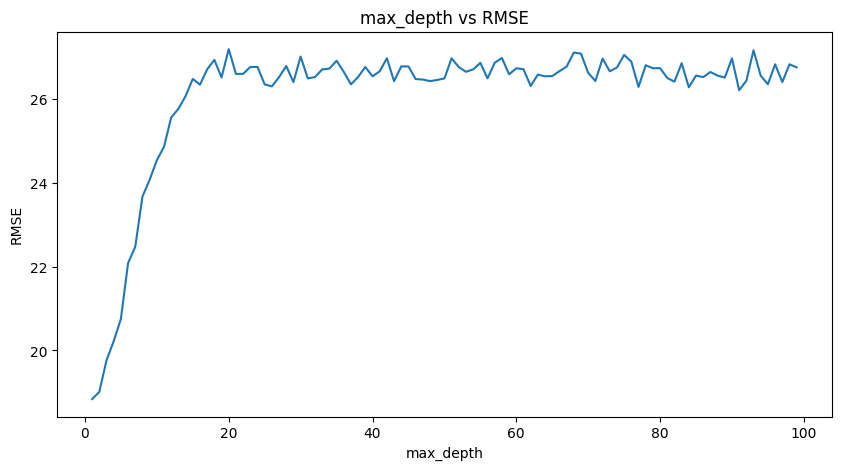

1

In [16]:
param = 'max_depth'
values = range(1, 100, 1)

team_max_depth = graph_param_RMSE(param, values, X_team, y_team)
team_max_depth

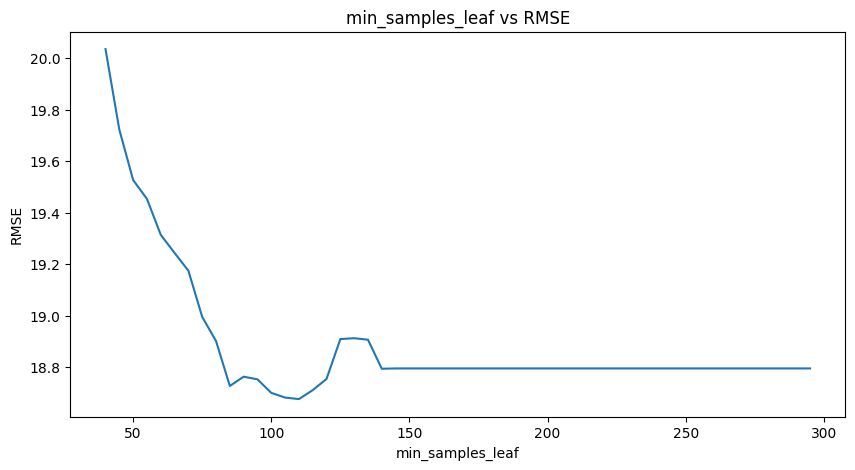

110

In [17]:
param = 'min_samples_leaf'
values = range(40, 300, 5)

team_min_samp_leaf = graph_param_RMSE(param, values, X_team, y_team)
team_min_samp_leaf

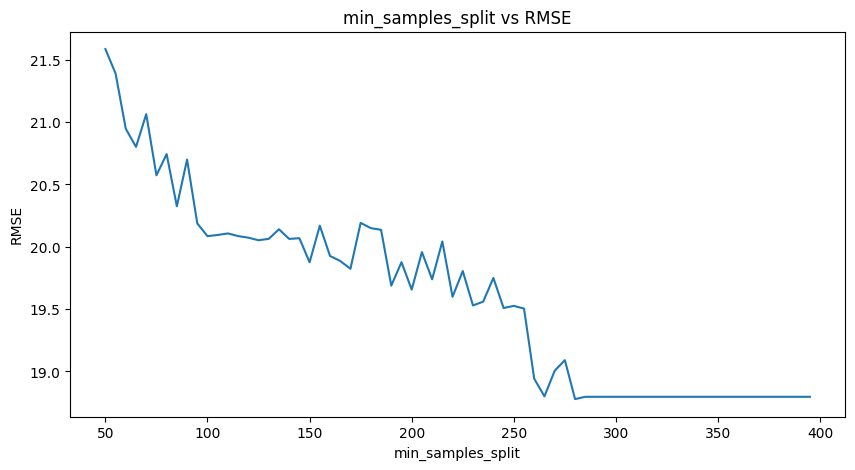

280

In [21]:
param = 'min_samples_split'
values = range(50, 400, 5)

team_min_samp_split = graph_param_RMSE(param, values, X_team, y_team)
team_min_samp_split

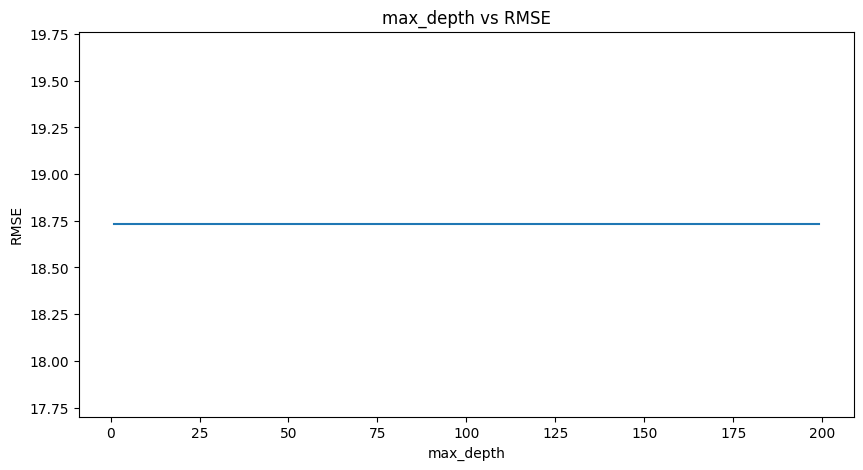

1

In [23]:
param = 'max_depth'
values = range(1, 200, 1)
scores = []
for i in values:
    model = DecisionTreeRegressor(**{param: i, 'min_samples_split': 280, 'min_samples_leaf': 110})
    scores.append(np.sqrt(-cross_val_score(model, X_team, y_team, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean()))

plt.figure(figsize=(10, 5))
plt.plot(values, scores)
plt.xlabel(param)
plt.ylabel('RMSE')
plt.title(f'{param} vs RMSE')
plt.show()
values[scores.index(min(scores))]

Intersting... I think its because this dataset hasn't really been working all along...

##### Team2

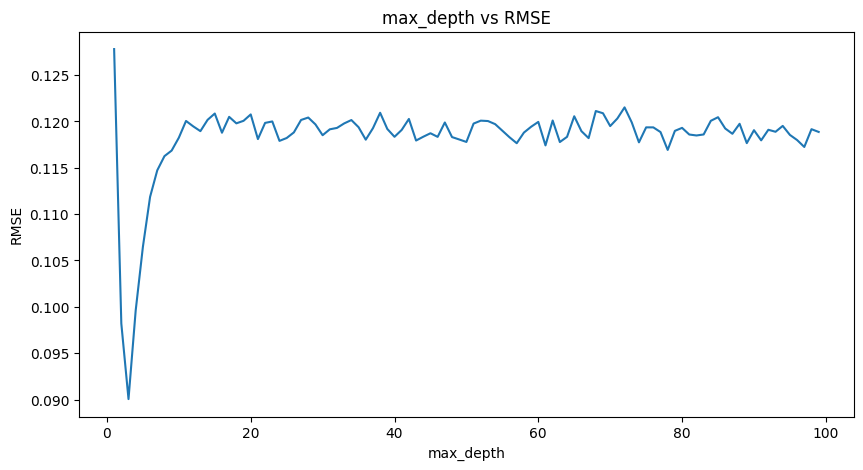

3

In [24]:
param = 'max_depth'
values = range(1, 100, 1)

team2_max_depth = graph_param_RMSE(param, values, X_team2, y_team2)
team2_max_depth

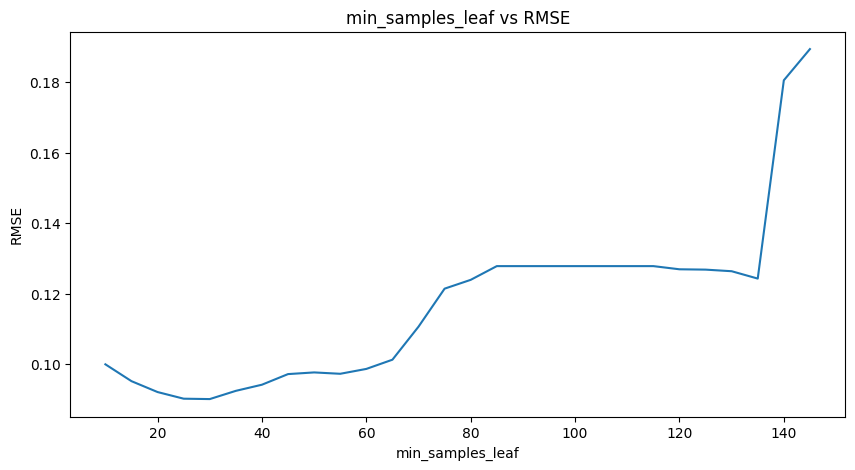

30

In [26]:
param = 'min_samples_leaf'
values = range(10, 150, 5)

team2_min_samp_leaf = graph_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_leaf

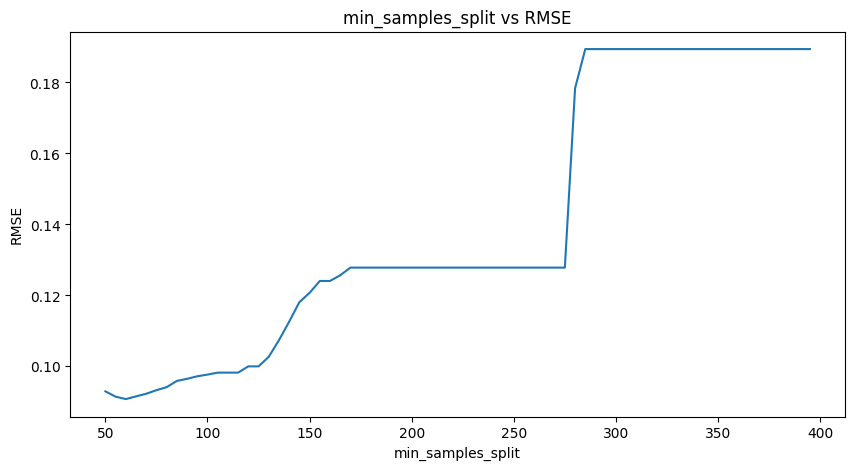

60

In [27]:
param = 'min_samples_split'
values = range(50, 400, 5)

team2_min_samp_split = graph_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_split

In [29]:
dec_team2 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=30, min_samples_split=60)

np.sqrt(-cross_val_score(dec_team2, X_team2, y_team2, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean())

np.float64(0.09016219286249931)

In [30]:
team2_param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [20, 25, 30, 35, 40], 'min_samples_split': [50, 55, 60, 65]}

team2_gs = GridSearchCV(DecisionTreeRegressor(), team2_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
team2_gs.fit(X_team2, y_team2)

print("Params:", team2_gs.best_params_)
print("RMSE:", np.sqrt(-team2_gs.best_score_))

Params: {'max_depth': 3, 'min_samples_leaf': 25, 'min_samples_split': 55}
RMSE: 0.08997614543982943


Not as good as Week 2 predictions, but solid.

##### WR

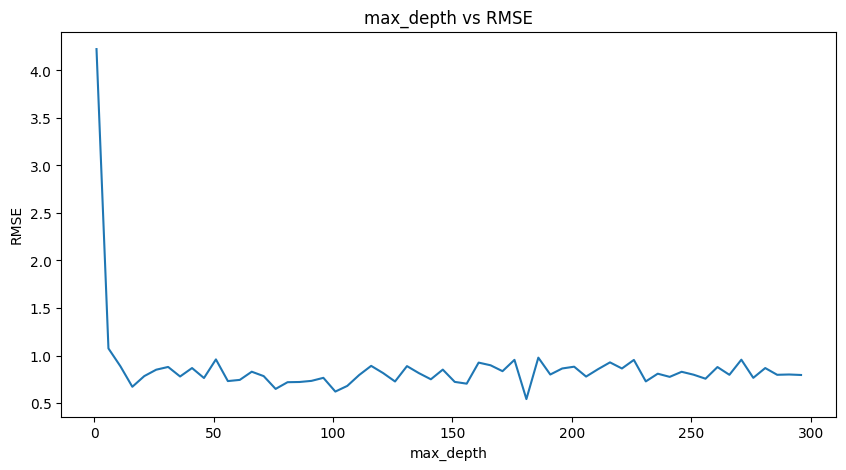

181

In [38]:
param = 'max_depth'
values = range(1, 300, 5)

wr_max_depth = graph_param_RMSE(param, values, X_wr, y_wr)
wr_max_depth

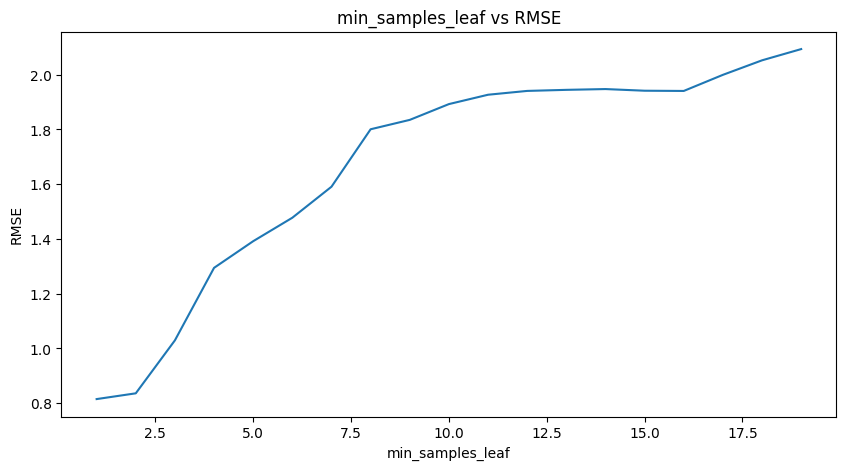

1

In [35]:
param = 'min_samples_leaf'
values = range(1, 20, 1)

wr_min_samp_leaf = graph_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_leaf

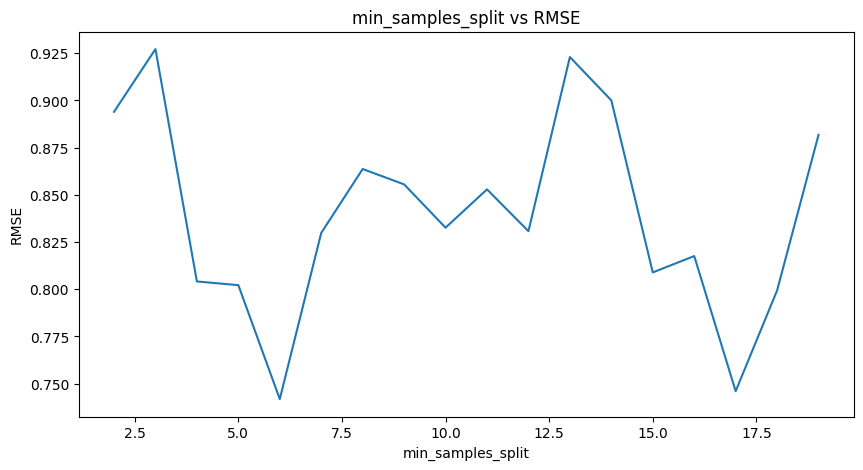

6

In [37]:
param = 'min_samples_split'
values = range(2, 20, 1)

wr_min_samp_split = graph_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_split

In [39]:
dec_wr = DecisionTreeRegressor(max_depth=181, min_samples_leaf=1, min_samples_split=6)

np.sqrt(-cross_val_score(dec_wr, X_wr, y_wr, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean())

np.float64(0.6632052999194666)

In [42]:
wr_param_grid = {'max_depth': [10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [1, 2, 3, 5]}

wr_gs = GridSearchCV(DecisionTreeRegressor(), wr_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
wr_gs.fit(X_wr, y_wr)

print("Params:", wr_gs.best_params_)
print("RMSE:", np.sqrt(-wr_gs.best_score_))

Params: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3}
RMSE: 0.36285395775596213


c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mgurg\Desktop\BU OMCDS\Semester-3\datascience\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

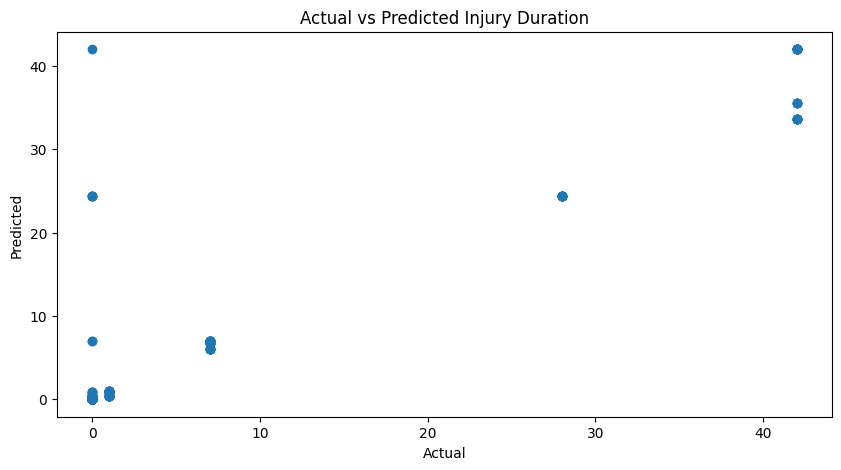

1.3973772405723566

In [56]:
X_wr_train, X_wr_test, y_wr_train, y_wr_test = train_test_split(X_wr, y_wr, test_size=.25, random_state=42)

wr_model = DecisionTreeRegressor(max_depth= 11, min_samples_leaf= 5, min_samples_split= 3)
wr_model.fit(X_wr_train, y_wr_train)
wr_preds = wr_model.predict(X_wr_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_wr_test, wr_preds)
plt.title('Actual vs Predicted Injury Duration')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

root_mean_squared_error(y_wr_test, wr_preds)

## Random Forest

In [57]:
def graph_rf_param_RMSE(param, values, X, y):

    scores = []
    for i in values:
        model = RandomForestRegressor(**{param: i})
        scores.append(np.sqrt(-cross_val_score(model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean()))

    plt.figure(figsize=(10, 5))
    plt.plot(values, scores)
    plt.xlabel(param)
    plt.ylabel('RMSE')
    plt.title(f'{param} vs RMSE')
    plt.show()
    return values[scores.index(min(scores))]

##### Team

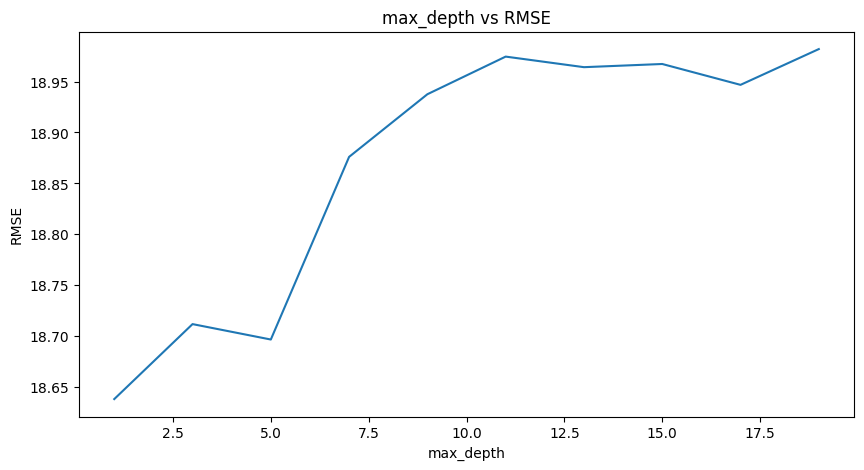

1

In [63]:
param = 'max_depth'
values = range(1, 20, 2)

team_max_depth = graph_rf_param_RMSE(param, values, X_team, y_team)
team_max_depth

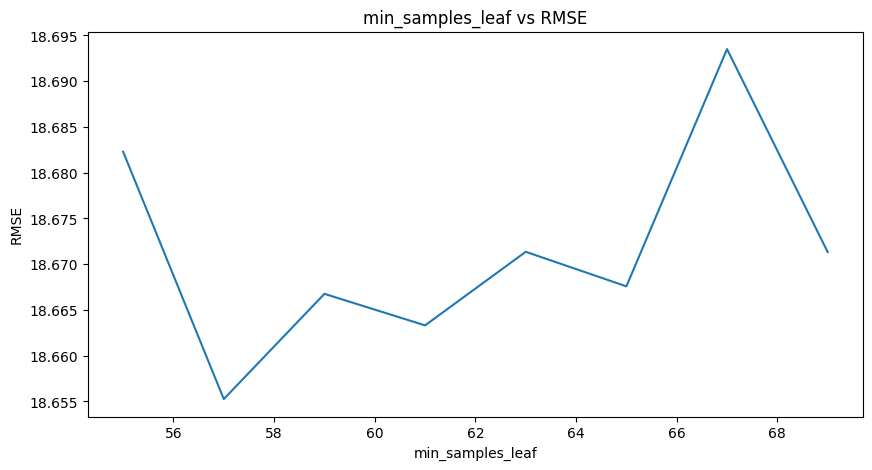

57

In [67]:
param = 'min_samples_leaf'
values = range(55, 70, 2)

team_min_samp_leaf = graph_rf_param_RMSE(param, values, X_team, y_team)
team_min_samp_leaf

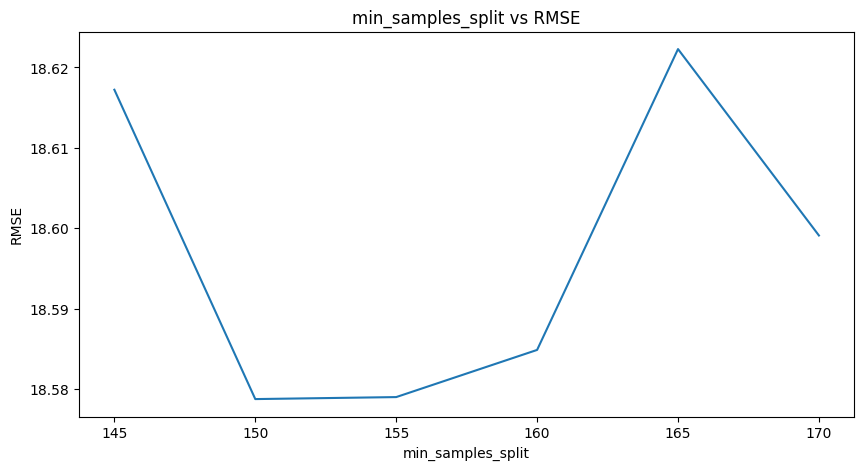

150

In [70]:
param = 'min_samples_split'
values = range(145, 175, 5)

team_min_samp_split = graph_rf_param_RMSE(param, values, X_team, y_team)
team_min_samp_split

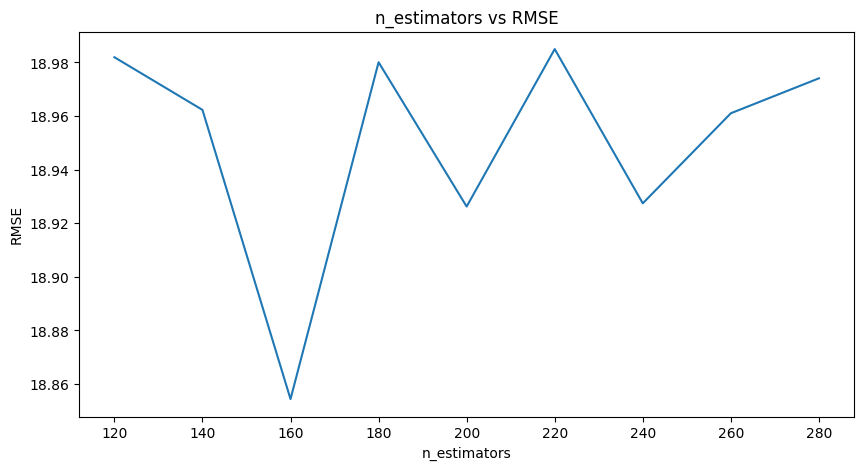

160

In [71]:
param = 'n_estimators'
values = range(120, 300, 20)

team_min_samp_split = graph_rf_param_RMSE(param, values, X_team, y_team)
team_min_samp_split

In [73]:
team_param_grid = {'max_depth': [1, 5], 'min_samples_leaf': [57], 'min_samples_split': [150, 155], 'n_estimators': [155, 160, 165]}

team_gs = GridSearchCV(RandomForestRegressor(), team_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
team_gs.fit(X_team, y_team)

print("Params:", team_gs.best_params_)
print("RMSE:", np.sqrt(-team_gs.best_score_))

Params: {'max_depth': 1, 'min_samples_leaf': 57, 'min_samples_split': 155, 'n_estimators': 160}
RMSE: 18.667080412293597


Team2

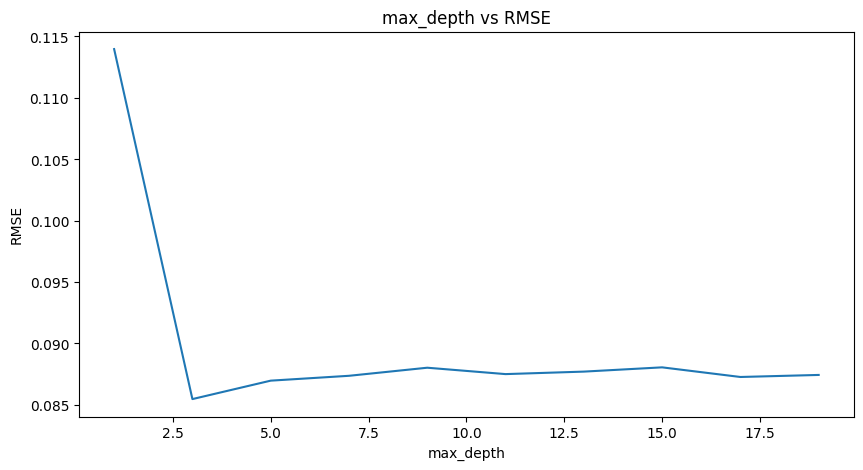

3

In [74]:
param = 'max_depth'
values = range(1, 20, 2)

team2_max_depth = graph_rf_param_RMSE(param, values, X_team2, y_team2)
team2_max_depth

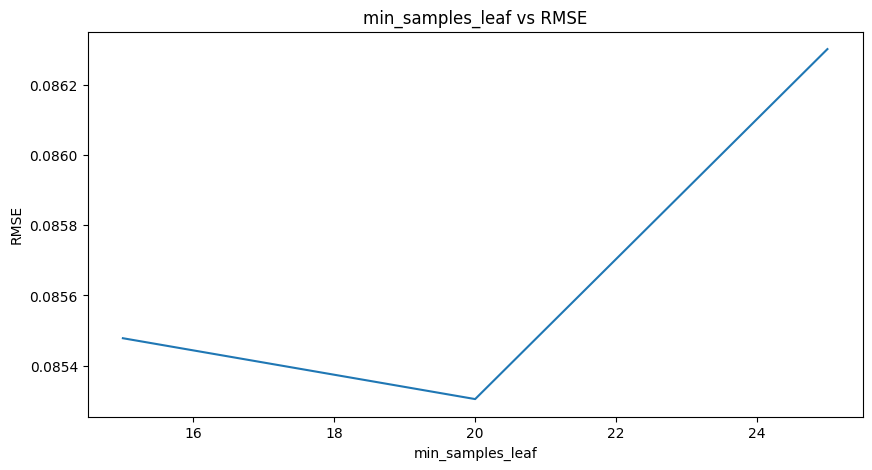

20

In [96]:
param = 'min_samples_leaf'
values = range(15, 30, 5)

team2_min_samp_leaf = graph_rf_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_leaf

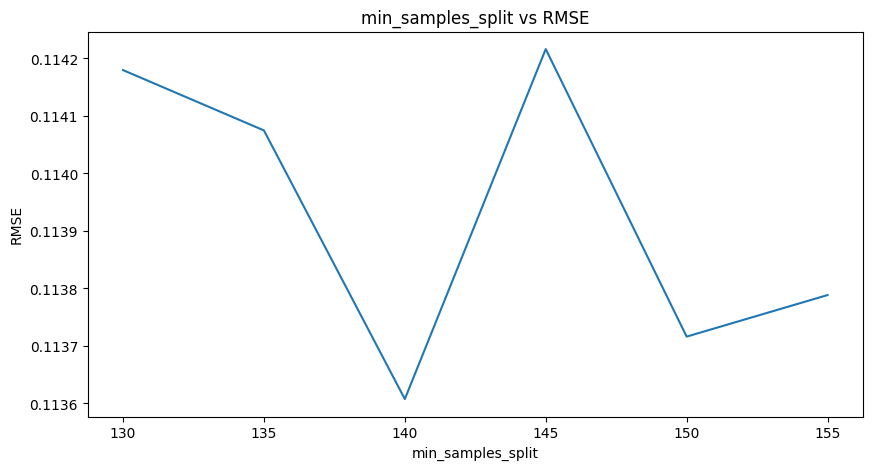

140

In [84]:
param = 'min_samples_split'
values = range(130, 160, 5)

team2_min_samp_split = graph_rf_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_split

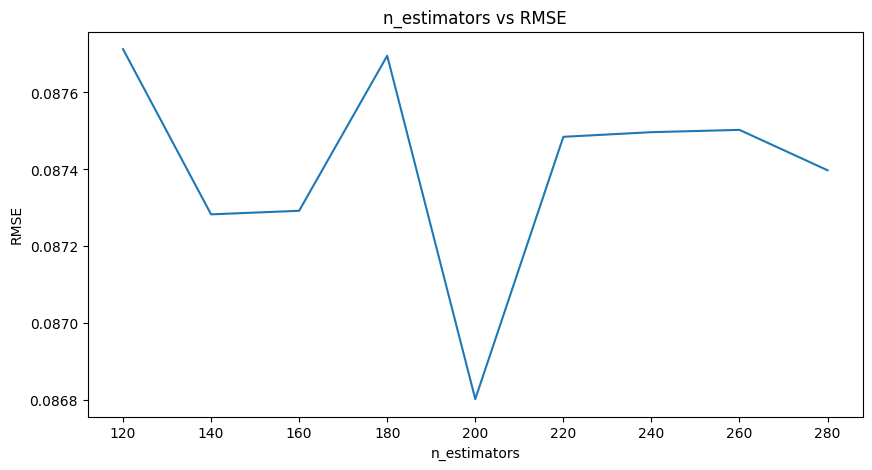

200

In [77]:
param = 'n_estimators'
values = range(120, 300, 20)

team2_min_samp_split = graph_rf_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_split

In [97]:
team2_param_grid = {'max_depth': [3], 'min_samples_leaf': [15, 20], 'min_samples_split': [140, 150], 'n_estimators': [200]}

team2_gs = GridSearchCV(RandomForestRegressor(), team2_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
team2_gs.fit(X_team2, y_team2)

print("Params:", team2_gs.best_params_)
print("RMSE:", np.sqrt(-team2_gs.best_score_))

Params: {'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 150, 'n_estimators': 200}
RMSE: 0.11417061256468053


##### WR

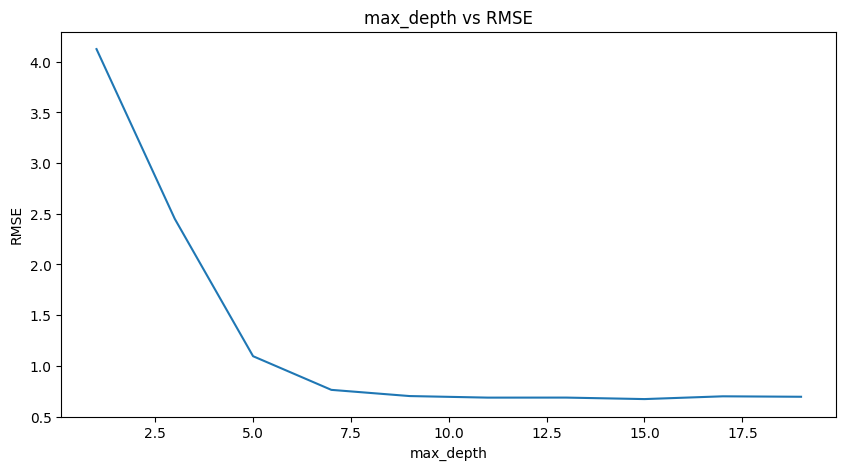

15

In [79]:
param = 'max_depth'
values = range(1, 20, 2)

wr_max_depth = graph_rf_param_RMSE(param, values, X_wr, y_wr)
wr_max_depth

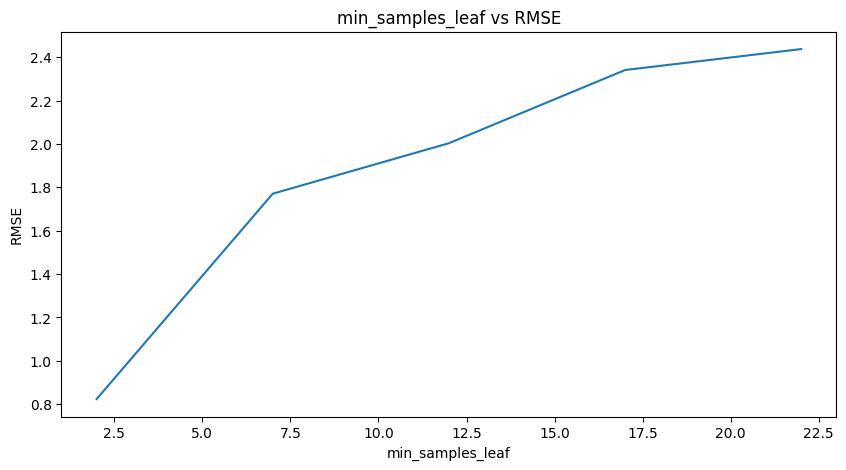

2

In [89]:
param = 'min_samples_leaf'
values = range(2, 23, 5)

wr_min_samp_leaf = graph_rf_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_leaf

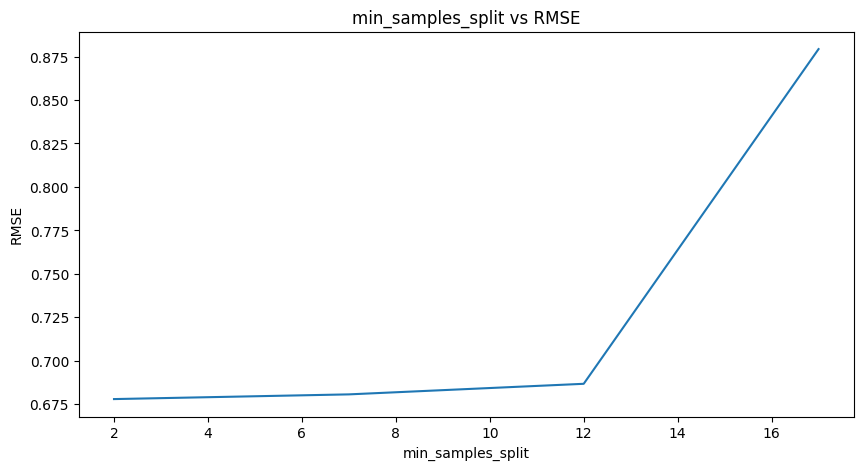

2

In [100]:
param = 'min_samples_split'
values = range(2, 18, 5)

wr_min_samp_split = graph_rf_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_split

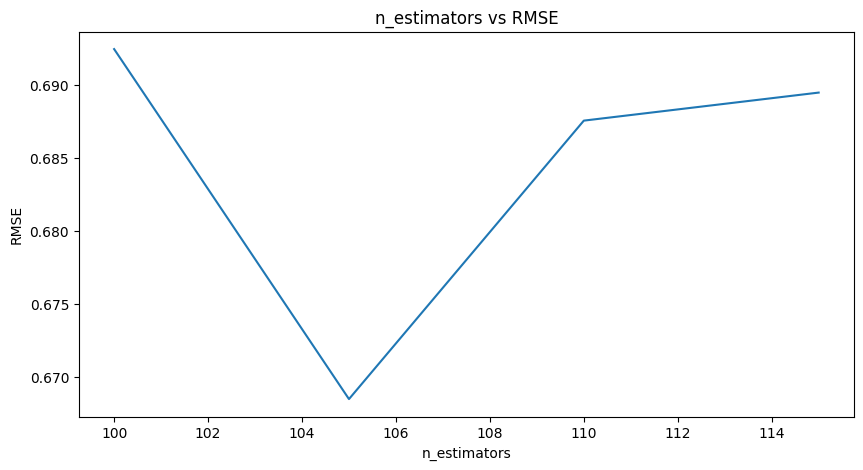

105

In [88]:
param = 'n_estimators'
values = range(100, 120, 5)

wr_min_samp_split = graph_rf_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_split

In [93]:
wr_param_grid = {'max_depth': [15], 'min_samples_leaf': [2, 5], 'min_samples_split': [105], 'n_estimators': [105]}

wr_gs = GridSearchCV(RandomForestRegressor(), wr_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
wr_gs.fit(X_wr, y_wr)

print("Params:", wr_gs.best_params_)
print("RMSE:", np.sqrt(-wr_gs.best_score_))

Params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 150, 'n_estimators': 105}
RMSE: 3.404271341765918
